<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/HACK_CU_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/drive/MyDrive/Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Code to Save trained Model

!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.8.0


In [ ]:
checkpoint_path = "/content/drive/MyDrive/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'cp.ckpt.index', 'checkpoint']

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15,
    callbacks=[cp_callback]
)

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.3533 - acc: 0.8570
Epoch 1: saving model to /content/drive/MyDrive/training_1/cp.ckpt
15/15 [==============================] - 39s 3s/step - loss: 0.3533 - acc: 0.8570 - val_loss: 0.2801 - val_acc: 0.9121
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 0.2655 - acc: 0.8897
Epoch 2: saving model to /content/drive/MyDrive/training_1/cp.ckpt
15/15 [==============================] - 40s 3s/step - loss: 0.2655 - acc: 0.8897 - val_loss: 0.2101 - val_acc: 0.9372
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.2169 - acc: 0.9192
Epoch 3: saving model to /content/drive/MyDrive/training_1/cp.ckpt
15/15 [==============================] - 38s 3s/step - loss: 0.2169 - acc: 0.9192 - val_loss: 0.2077 - val_acc: 0.9331
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.2167 - acc: 0.9181
Epoch 4: saving model to /content/drive/MyDrive/training_1/cp.ckpt
15/15 [============

In [37]:
path = '/content/fire1.jpeg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
print(classes)
print(np.argmax(classes[0])==0, max(classes[0]))

[[9.993711e-01 6.289441e-04]]
True 0.9993711


In [ ]:
# model.load_weights(checkpoint_path)
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
# !mkdir -p /content/saved_model
model.save('saved_model/model-v2') 

INFO:tensorflow:Assets written to: saved_model/model-v2/assets


In [ ]:
pulled_model = tf.keras.models.load_model('/content/saved_model/model-v2')

# Check its architecture
pulled_model.summary()


In [39]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = pulled_model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving testimonial-2.png to testimonial-2.png
True 0.752499


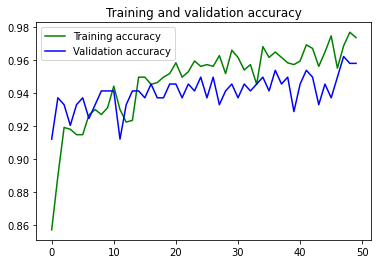

<Figure size 432x288 with 0 Axes>

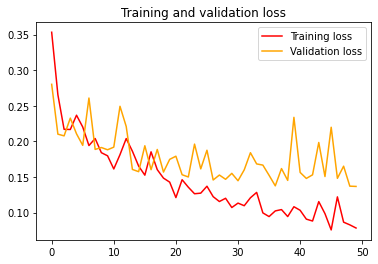

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# !zip -r /content/saved_model/.zip /content/drive/MyDrive/Colab\ Notebooks/
# !cp -r /content/saved_model /content/drive/MyDrive/trained_model

In [ ]:
pulled_model_trained_mode = tf.keras.models.load_model('/content/drive/MyDrive/trained_model/model-v2')

# Check its architecture
pulled_model_trained_mode.summary()

In [ ]:
path = '/content/fire1.jpeg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = pulled_model_trained_mode.predict(x)
print(classes)
print(np.argmax(classes[0])==0, max(classes[0]))

[[9.993711e-01 6.289441e-04]]
True 0.9993711


In [ ]:
!pip install flask-ngrok

In [50]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

/drive/ngrok-ssh
--2022-03-05 21:58:33--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  58.7MB/s    in 0.2s    

2022-03-05 21:58:34 (58.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!pip install -U flask-cors

In [53]:
!/ngrok authtoken 25LRYelUVdA8lUkbQP4PtgZjoMk_3Af8qnYETARPmnUd5doMU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# !/tmp/ngrok/ngrok authtoken 25LRYelUVdA8lUkbQP4PtgZjoMk_3Af8qnYETARPmnUd5doMU

In [72]:
!pip3 install twilio

     |████████████████████████████████| 1.4 MB 5.0 MB/s 


In [ ]:
from PIL import Image
import io
from flask import Flask, request,jsonify
from flask_ngrok import run_with_ngrok
from flask_cors import CORS, cross_origin
from twilio.rest import Client
import traceback
app = Flask(__name__)
cors = CORS(app)
app.config['CORS_HEADERS'] = 'Content-Type'   
run_with_ngrok(app)
# import jsonpickle
  

def sendSms():
  message = "Fire Alert!!!!"
  contact="+17207611606"
  account_sid =  "AC95a1592926d32067e3919a8c4512277f"
  auth_token =  "aff3791aaa7b806d78e449dec421cefd"
  client = Client(account_sid, auth_token)
  message = client.messages \
                .create(
                     body=message,
                     messaging_service_sid='MG88dac29d1519469ff8d02cdd92f27e60',
                     to=contact
                 )
  print(message.sid)

@app.route("/predict", methods=['POST'])
@cross_origin()        
def predict():
  try:
    print("You are HERE")
    # data = request.get_data()
    # print(request.data)
    # print(request.files)
    img = request.files['image']
    
    img = Image.open(img.stream)
    img = img.resize((224, 224), Image.ANTIALIAS)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) /255
    classes = pulled_model_trained_mode.predict(x)
    print(np.argmax(classes[0])==0, max(classes[0]))
    status = (np.argmax(classes[0])==0)
    confidence_level = float(max(classes[0]))*100
    msg = "No Fire"
    if(confidence_level > 80 and str(status) == "True"):
      message = "Fire Alert!!!!"
      sendSms()
      msg = "Alert Send to Sachin: +1 ******1606"

    response = {
        'status': str(status),
        'confidence_level' : str(confidence_level),
        'message': msg
    }
    return jsonify(response )
  except Exception:
      print(traceback.format_exc())
      response = {'error':'ok'}
      return response
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9be1-35-231-110-7.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
You are HERE
True 0.99974483


127.0.0.1 - - [06/Mar/2022 00:06:56] "POST /predict HTTP/1.1" 200 -


SMa839f6a9b6ad4e8c846991c6618516c9


127.0.0.1 - - [06/Mar/2022 00:07:07] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [06/Mar/2022 00:07:51] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2022 00:07:51] "POST /predict HTTP/1.1" 200 -


You are HERE
Traceback (most recent call last):
  File "<ipython-input-89-7abdb030bfcc>", line 36, in predict
    img = request.files['image']
  File "/usr/local/lib/python3.7/dist-packages/werkzeug/datastructures.py", line 442, in __getitem__
    raise exceptions.BadRequestKeyError(key)
werkzeug.exceptions.BadRequestKeyError: 400 Bad Request: The browser (or proxy) sent a request that this server could not understand.

